<a href="https://colab.research.google.com/github/audrey-fontana/regressao_resistencia_concreto/blob/main/DNC_Desafio_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de concreto para a construção civil

###Leitura e tratamento da base

In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Para ler os arquivos direto do drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Lendo o data set
df = pd.read_csv("/content/drive/MyDrive/Educação/DNC - Aulas/Datasets/dados_concreto_-_Sheet1.csv")

In [5]:
#Verificando as primeiras linhas da base de dados
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [6]:
#Verificando o tipo de cada uma das features
df.dtypes

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age,float64
Concrete compressive strength,float64
Strength Category,object


In [7]:
#Verificando as estatísticas gerais da base de dados
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2020.000000
mean,415.147610,107.776688,78.604091,264.240315,9.045293,1444.538492,1139.313258,67.255643,35.886683
std,237.133806,145.230234,106.149019,111.056771,10.239884,604.194394,481.913282,103.260526,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.100000,776.400000,14.000000,23.500000
50%,350.400000,26.000000,0.000000,206.000000,7.800000,1104.000000,889.000000,28.000000,34.675000
75%,512.400000,187.000000,136.200000,345.800000,13.600000,1911.800000,1502.800000,75.600000,46.230000
max,1487.600000,923.700000,500.900000,639.900000,83.700000,3150.000000,2779.300000,1022.000000,87.200000


In [8]:
#Verificando a presença de valores nulos
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,9
Strength Category,0


In [9]:
#Remoção das linhas faltantes da variável "Concrete compressive strength"
#Como apenas 9 linhas estão com dados faltantes, a remoção não terá um impacto significativo no tamanho da base de dados
df.dropna(inplace=True)

In [10]:
#Contar quantos valores distintos tem na variável "Strength Category"
df['Strength Category'].value_counts()

,count
Strength Category,
Baixa,1831
Alto,189


In [11]:
#Utilizar o Label Encoding para a variável "Strength Category"
#Utilizada essa técnica pois há apenas dois valores distintos para essa variável
df['Strength Category'] = LabelEncoder().fit_transform(df['Strength Category'])

In [12]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,1


###EDA - Análise exploratória de dados

Objetivo: Entender os dados e identificar padrões visuais. Para isso, será realizada uma análise visual e estatística para entender os padrões dos dados

####1. Quais fatores estão mais associados à resistência do concreto?
    
Análise da correlação entre as variáveis numéricas e a **resistência do concreto** (variável dependente). Utilização de gráficos de dispersão e matrizes de correlação para identificar relações entre as variáveis.

In [13]:
#Cálculo da matriz de correlação absoluta
absolute_correlation_matrix = df.corr().abs()

#Análise estatística
#Extrai as correlações absolutas com a variável alvo ('Concrete compressive strength'),
#Remove a correlação da variável com ela mesma (que é 1.0) e ordena em ordem decrescente
target_abs_corr = absolute_correlation_matrix['Concrete compressive strength'].drop('Concrete compressive strength').sort_values(ascending=False)

#Imprime as correlações absolutas ordenadas
print("Módulo da Correlação das variáveis com 'Concrete compressive strength':\n")
print(target_abs_corr.to_markdown(numalign="left", stralign="left"))



Módulo da Correlação das variáveis com 'Concrete compressive strength':

|                    | Concrete compressive strength   |
|:-------------------|:--------------------------------|
| Strength Category  | 0.627539                        |
| Superplasticizer   | 0.329791                        |
| Cement             | 0.327826                        |
| Age                | 0.290215                        |
| Blast Furnace Slag | 0.106848                        |
| Fly Ash            | 0.089434                        |
| Water              | 0.0576461                       |
| Coarse Aggregate   | 0.0172088                       |
| Fine Aggregate     | 0.0150732                       |


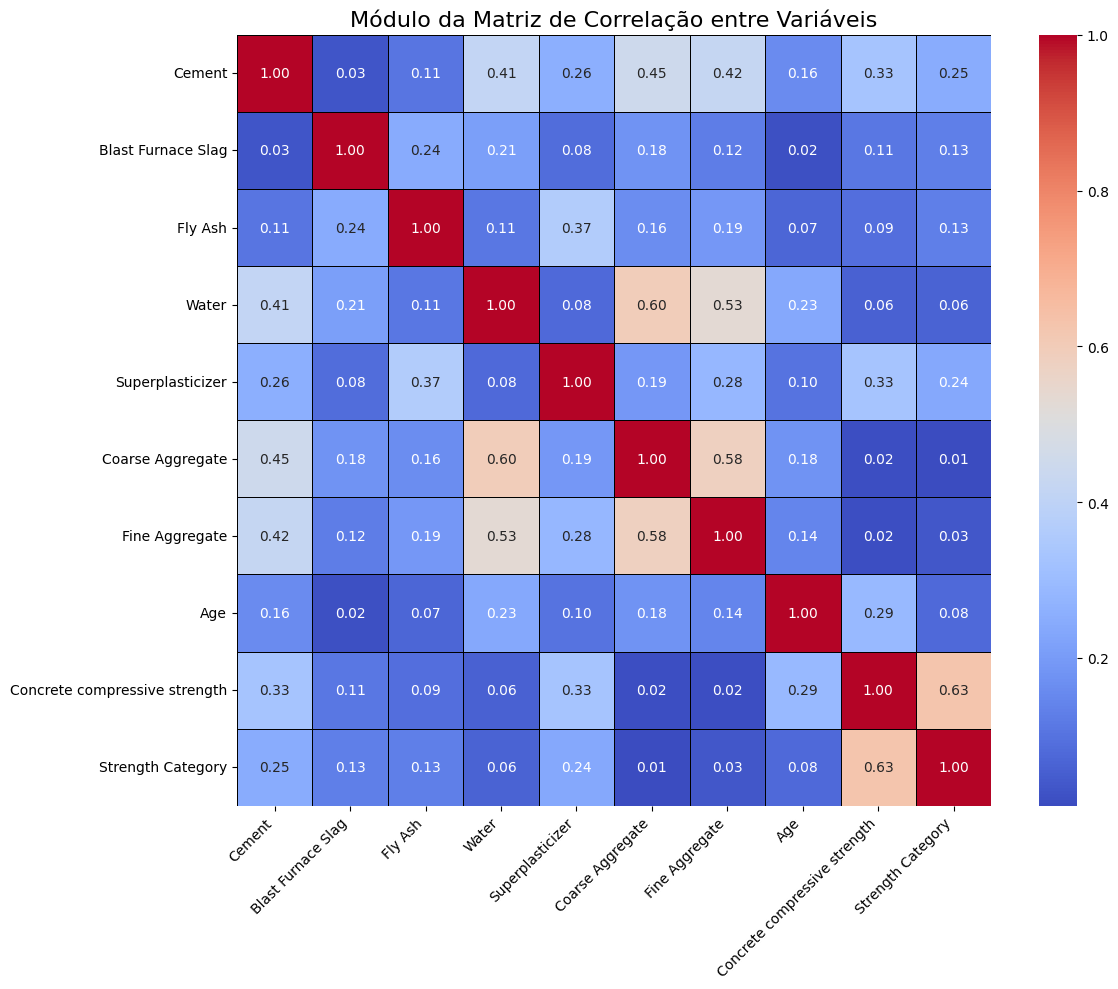

In [14]:
#Mapa de calor
plt.figure(figsize=(12, 10))

sns.heatmap(
    absolute_correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

# Adiciona título e ajusta os rótulos
plt.title('Módulo da Matriz de Correlação entre Variáveis', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####2. Como a quantidade de cimento afeta a resistência do concreto?
Criação de um gráfico de dispersão entre **Cimento** e **Concrete compressive strength** para visualizar se há uma tendência de aumento da resistência com o aumento do cimento.

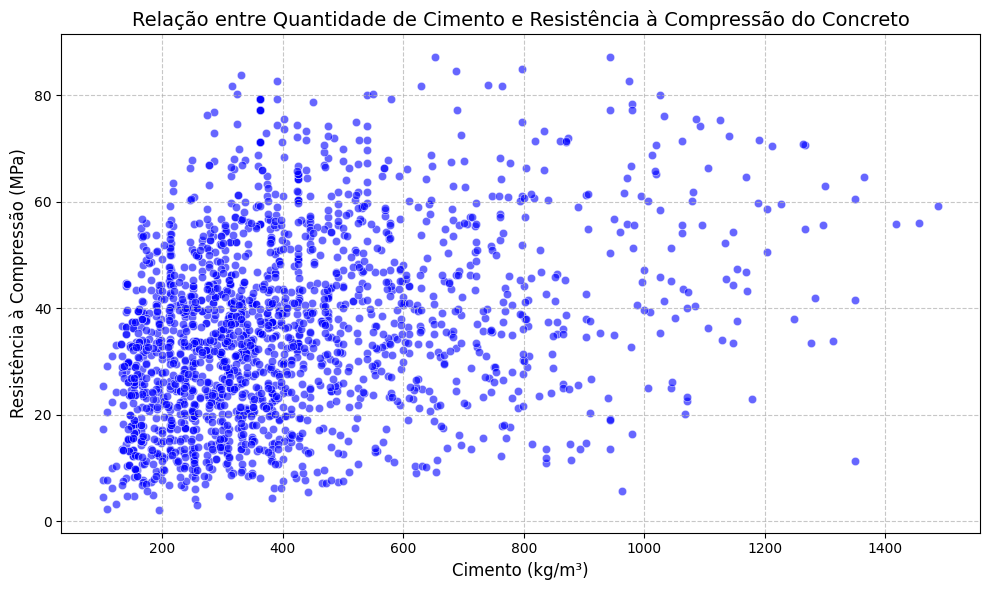

In [15]:
#Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Cement',
    y='Concrete compressive strength',
    data=df,
    alpha=0.6,
    color='blue'
)

#Adiciona títulos e rótulos
plt.title('Relação entre Quantidade de Cimento e Resistência à Compressão do Concreto', fontsize=14)
plt.xlabel('Cimento (kg/m³)', fontsize=12)
plt.ylabel('Resistência à Compressão (MPa)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Análise de Cimento vs. Resistência:

**Tendência:** Há uma tendência geral de aumento na resistência do concreto à medida que a quantidade de cimento (`Cement`) aumenta. A nuvem de pontos se eleva ligeiramente para a direita.

**Variação:** No entanto, a relação não é perfeita. Há uma dispersão considerável dos dados, especialmente em níveis mais altos de cimento, o que indica que outros fatores (como Água, Idade, Superplastificante) também são cruciais para determinar a resistência final.

**Correlação Estatística:** O coeficiente de correlação de Pearson entre o Cement e a Concrete compressive strength é 0.33, o que confirma uma relação positiva fraca/moderada.

####3. Como a água afeta a resistência do concreto?

Criação de um gráfico de dispersão entre **Água** e **Concrete compressive strength** para verificar se há alguma relação entre esses fatores.

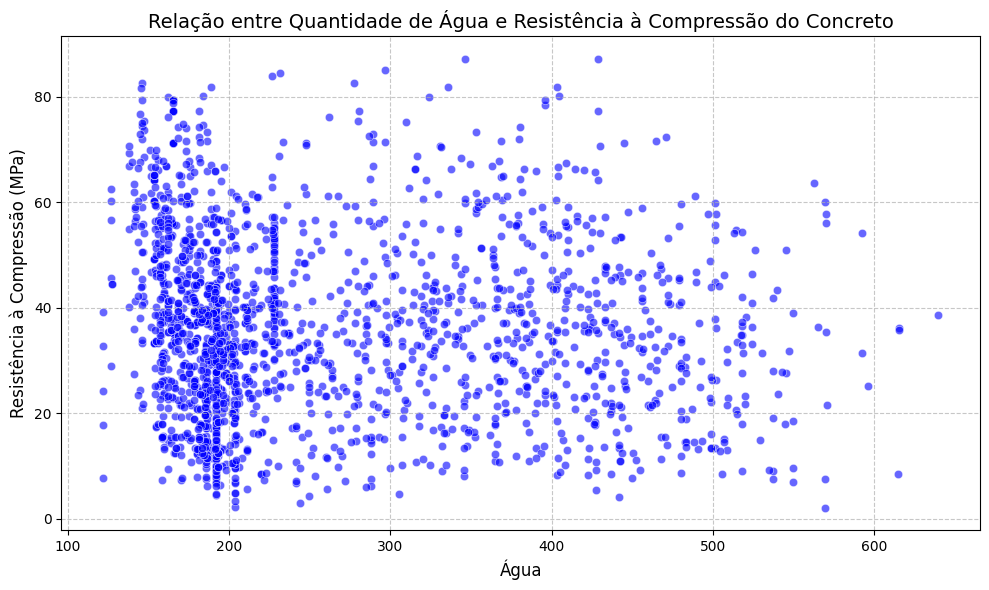

In [16]:
#Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Water',
    y='Concrete compressive strength',
    data=df,
    alpha=0.6,
    color='blue'
)

#Adiciona títulos e rótulos
plt.title('Relação entre Quantidade de Água e Resistência à Compressão do Concreto', fontsize=14)
plt.xlabel('Água', fontsize=12)
plt.ylabel('Resistência à Compressão (MPa)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Análise de Água vs. Resistência

A nuvem de pontos no gráfico de dispersão mostra que a quantidade de água não possui uma relação linear clara com a resistência à compressão do concreto. Os pontos estão muito dispersos horizontalmente em relação à resistência.

**Correlação Estatística:** O coeficiente de correlação de Pearson entre Water e Concrete compressive strength é de -0.06.

####4. Qual é a resistência média do concreto por categoria de força?

Cálculo da resistência média por **Strength Category** (Alta, Média, Baixa) e exibição em um gráfico de barras horizontais.

Resistência Média do Concreto por Categoria:
| Strength Category   | Concrete compressive strength   |
|:--------------------|:--------------------------------|
| Baixa               | 32.4882                         |
| Alto                | 68.8103                         |


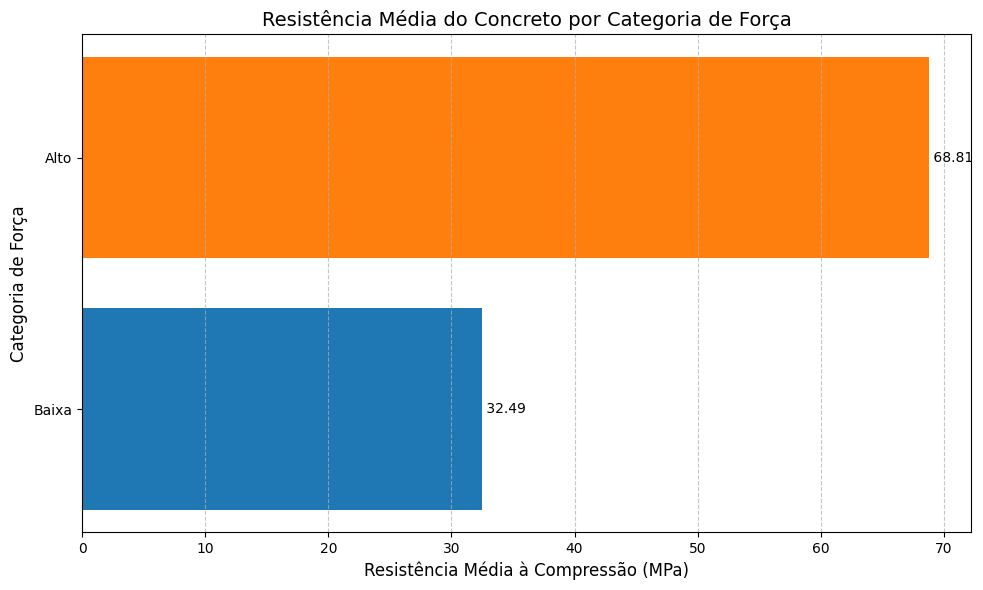

In [17]:
#Mapeamento para reverter os valores numéricos para os rótulos de string ()'Alto': 0, 'Baixa': 1)
category_name_mapping = {
    0: 'Alto',
    1: 'Baixa'
}

#Calcular a resistência média por categoria (a coluna 'Strength Category' está agora em 0/1)
mean_strength_by_numeric_category = df.groupby('Strength Category')['Concrete compressive strength'].mean()

#Renomear o índice numérico (0, 1) para os rótulos de string ('Alto', 'Baixa') e ordenar
mean_strength_by_category_labeled = mean_strength_by_numeric_category.rename(category_name_mapping).sort_values(ascending=True)

#Separar índice (categorias) e valores (médias)
categories = mean_strength_by_category_labeled.index
means = mean_strength_by_category_labeled.values
colors = ['#1f77b4', '#ff7f0e'] # Cores definidas para as barras

#Imprimir os resultados para confirmação
print("Resistência Média do Concreto por Categoria:")
print(mean_strength_by_category_labeled.to_markdown(numalign="left", stralign="left"))

#Criar o gráfico de barras horizontais usando plt.barh (mais robusto)
plt.figure(figsize=(10, 6))
plt.barh(
    categories,
    means,
    color=colors
)

#Adicionar títulos e rótulos
plt.title('Resistência Média do Concreto por Categoria de Força', fontsize=14)
plt.xlabel('Resistência Média à Compressão (MPa)', fontsize=12)
plt.ylabel('Categoria de Força', fontsize=12)

#Adicionar anotações com os valores médios nas barras
for index, value in enumerate(means):
    # Coloca o texto perto da barra
    plt.text(value, index, f' {value:.2f}', va='center')

#Corrigir o layout, ajustando a margem esquerda para os rótulos
plt.subplots_adjust(left=0.15)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Construção e avaliação de modelos de regressão

#### 1. Modelo de Regressão:

- Prever a resistência do concreto com base em variáveis como **Cimento**, **Água**, **Superplasticizer**, **Coarse Aggregate**, etc.

- Utilizar o modelo **Random Forest Regressor** para prever a resistência do concreto.

- Utilizar **R²**, e **MAE**  para avaliar o desempenho do modelo.

In [18]:
#Importando bibliotecas específicas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
#Definir a variável alvo (y) e as features (X)
target_column = 'Concrete compressive strength'
y = df[target_column]

feature_columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age'
]

X = df[feature_columns]

In [41]:
#Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinar o modelo Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_train, y_train)

#Fazer previsões no conjunto de teste
y_pred = rfr.predict(X_test)

In [42]:
#Criando uma função para análise das métricas R² e MAE

def evaluate_model_performance(y_test, y_pred):
    #Calcula as métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    #Exibe os resultados
    print("--- Avaliação do Desempenho do Modelo ---")
    print(f"Coeficiente de Determinação (R²): {r2:.4f}")
    print(f"Erro Absoluto Médio (MAE): {mae:.4f}")

    #Retorna as métricas para uso externo, se necessário
    return r2, mae

In [43]:
#Avaliando para Random Forest Regressor
evaluate_model_performance(y_test, y_pred=y_pred)

--- Avaliação do Desempenho do Modelo ---
Coeficiente de Determinação (R²): 0.7806
Erro Absoluto Médio (MAE): 5.4255


(0.7805833251532848, 5.4254783657472885)

####2. Modelo de Regressão Linear:

 - Adicionar um modelo de Regressão Linear para comparar com o modelo de Random Forest.

In [44]:
#Importando bibliotecas específicas
from sklearn.linear_model import LinearRegression

In [46]:
#Definir a variável alvo (y) e as features (X)
target_column = 'Concrete compressive strength'
y = df[target_column]

feature_columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age'
]

X = df[feature_columns]

In [47]:
#Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Treinar o modelo de Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)

#Fazer previsões
y_pred_lr = lr.predict(X_test)

In [49]:
#Avaliar o desempenho da regressão linear
evaluate_model_performance(y_test, y_pred_lr)

--- Avaliação do Desempenho do Modelo ---
Coeficiente de Determinação (R²): 0.3731
Erro Absoluto Médio (MAE): 10.3661


(0.373097345360902, 10.366095631758805)

O modelo **Random Forest Regressor** demonstrou ser o melhor em prever a resistência do concreto.

**R²:** O Random Forest explica aproximadamente 78% da variação na resistência do concreto, enquanto a Regressão Linear explica 37,3%.

**MAE:** O erro médio das previsões do Random Forest é de 5.40 que é menor do que o erro da Regressão Linear 10.37


####3. Modelo XGBoost

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
#Definir a variável alvo (y) e as features (X)
target_column = 'Concrete compressive strength'
y = df[target_column]

feature_columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age'
]

X = df[feature_columns]

In [51]:
#Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Treinar o modelo de Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

#Fazer previsões
y_pred_gbr = gbr.predict(X_test)

In [53]:
#Avaliar o desempenho do modelo
print("\n--- Resultados do Modelo Gradient Boosting Regressor ---")
r2_gbr, mae_gbr = evaluate_model_performance(y_test, y_pred_gbr)

#Exibir as 5 primeiras previsões vs. valores reais
results_gbr = pd.DataFrame({
    'Valor Real': y_test,
    'Previsão GBR': y_pred_gbr
}).head()

print("\nPrimeiras 5 Previsões GBR vs. Valores Reais:")
print(results_gbr.to_markdown(numalign="left", stralign="left"))


--- Resultados do Modelo Gradient Boosting Regressor ---
--- Avaliação do Desempenho do Modelo ---
Coeficiente de Determinação (R²): 0.7863
Erro Absoluto Médio (MAE): 5.7752

Primeiras 5 Previsões GBR vs. Valores Reais:
|      | Valor Real   | Previsão GBR   |
|:-----|:-------------|:---------------|
| 529  | 68.75        | 58.5644        |
| 494  | 56.34        | 56.7124        |
| 394  | 52.3         | 44.2163        |
| 1868 | 24.9         | 38.8522        |
| 1490 | 55           | 45.9672        |


O Modelo XGBoost é ligeiramente melhor do que o modelo de Random Forest Regressor

####Realizando o tunning do Random Forest Regressor

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
target_column = 'Concrete compressive strength'
y = df[target_column]

feature_columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age'
]
X = df[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definir a grade de hiperparâmetros
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

#Inicializar o RandomizedSearchCV
gbr = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions,
    n_iter=50,          # Número de combinações a serem testadas
    scoring='r2',       # Otimizar para o maior R²
    cv=5,               # Cross-Validation de 5 folds
    verbose=1,          # Exibir detalhes da busca
    random_state=42,
    n_jobs=-1
)

#Executar a busca no conjunto de treino
random_search.fit(X_train, y_train)

#Exibir os melhores parâmetros encontrados
print("\n--- Otimização de Hiperparâmetros (Randomized Search) ---")
print(f"Melhor R² de Cross-Validation: {random_search.best_score_:.4f}")
print("Melhores Parâmetros Encontrados:")
print(random_search.best_params_)

#Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_gbr = random_search.best_estimator_
y_pred_tuned = best_gbr.predict(X_test)

#Avaliar e exibir as métricas finais
evaluate_model_performance(y_test, y_pred_tuned)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

--- Otimização de Hiperparâmetros (Randomized Search) ---
Melhor R² de Cross-Validation: 0.7830
Melhores Parâmetros Encontrados:
{'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1}

--- Avaliação do Desempenho do Modelo Tunado ---
Coeficiente de Determinação (R²): 0.8117
Erro Absoluto Médio (MAE): 4.8752 MPa


(0.811698672980635, 4.8751728126176825)

###Avaliando a importância das variáveis

In [69]:
#Extrair as Importâncias das Features
importances = best_gbr.feature_importances_
feature_names = X.columns

#Criar um DataFrame de importância e ordenar
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#Exibir a tabela de importância
print("Tabela de Importância das Variáveis (Ordenada):")
print(feature_importance_df.to_markdown(index=False, numalign="left", stralign="left"))

Tabela de Importância das Variáveis (Ordenada):
| Feature            | Importance   |
|:-------------------|:-------------|
| Age                | 0.333368     |
| Cement             | 0.187294     |
| Superplasticizer   | 0.118076     |
| Water              | 0.10053      |
| Blast Furnace Slag | 0.0764517    |
| Fine Aggregate     | 0.0647651    |
| Fly Ash            | 0.0631886    |
| Coarse Aggregate   | 0.0563259    |


In [71]:
#Plotar a Importância das Features
plt.figure(figsize=(10, 7))

# Criando o gráfico com plt.barh
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color=sns.color_palette("viridis", len(feature_importance_df))
)

# Inverter o eixo y para que o mais importante fique no topo
plt.gca().invert_yaxis()

plt.title('Importância das Variáveis (Feature Importance) - GBR Tunado', fontsize=14)
plt.xlabel('Importância (Valor GINI)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance_gbr_fixed_final.png')
plt.close()
plt.show()

<Figure size 640x480 with 0 Axes>

###Realizando uma predição

resistência do concreto se ele tiver os seguintes indicadores:

- Cement: 550
- Blast Furnace Slag: 150
- Fly Ash: 0
- Water: 180
- Superplasticizer: 2.5
- Coarse Aggregate: 1000
- Fine Aggregate: 700
- Age: 25

In [60]:
#Os valores fornecidos pelo usuário, na ordem correta das features:
new_data = {
    'Cement': [550],
    'Blast Furnace Slag': [150],
    'Fly Ash': [0],
    'Water': [180],
    'Superplasticizer': [2.5],
    'Coarse Aggregate': [1000],
    'Fine Aggregate': [700],
    'Age': [25]
}

#Criar o DataFrame de entrada, garantindo que as colunas estejam na mesma ordem usada no treino
new_df = pd.DataFrame(new_data, columns=feature_columns)

#Fazer a Previsão

# O [0] é usado para extrair o valor único do array de previsão
prediction = best_gbr.predict(new_df)[0]

#Apresentar o Resultado

print("\n--- Previsão de Resistência do Concreto ---")
print(f"Indicadores de Entrada:\n{new_df.to_markdown(index=False, numalign='left', stralign='left')}")
print(f"\nResistência Prevista (Modelo GBR Tunado): {prediction:.4f} MPa")


--- Previsão de Resistência do Concreto ---
Indicadores de Entrada:
| Cement   | Blast Furnace Slag   | Fly Ash   | Water   | Superplasticizer   | Coarse Aggregate   | Fine Aggregate   | Age   |
|:---------|:---------------------|:----------|:--------|:-------------------|:-------------------|:-----------------|:------|
| 550      | 150                  | 0         | 180     | 2.5                | 1000               | 700              | 25    |

Resistência Prevista (Modelo GBR Tunado): 58.4280 MPa


##